# Phase 2 project

This note book is designed to analyse data from the six different movie companies and decide which is best type of content the users consume for a company that is new to the movie making scene.

The analysis will be done in-order to answer the following questions:

* Which are the best performing movies categories to produce?
* Which demographics watch movies ?
* What each demographic prefer to watch ?

Specifically, this will cover:

* Using pandas to filter data
* Using scipy.stats to calcluate probalility and find suitability of data for recommendation

The analysis will divide each data source to a module within a note book. Data cleaning will done comprehensively then afterwords model will be selected to analysis the data so us to answer the business questions above.The modules are:

 #### 1 BOM movie company analysis
 #### 2 IMDB data source analysis
 #### 3 TMDB data source movie analysis
 #### 4 TN movie budgets dataset


In [1]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1  BOM movie company analysis(Maina Ndirangu)

In [2]:
#Loading the dataset
Data = pd.read_csv('bom_movie_gross.csv')
Data.head (5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Performing EDA on dataset

### Understanding the dataset

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Our data has a total of 5 columns and 3387 rows.
foreign_gross has 1350 missing values.
domestic_gross has 28 missing values.
studio has 5 missing values.
foreign_gross (object) column needs to be converted to numeric.

In [4]:
# converting the foreign_gross column into numeric
Data['foreign_gross'] = pd.to_numeric(Data['foreign_gross'].astype(str).str.replace('[^\d.]', '', regex=True),errors='coerce')

In [5]:
# missing values
Data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
#dropping the null values
Data.dropna(inplace=True)
Data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We now have a total of 2007 rows after dropping the missing values.

In [8]:
#Statistical Summary of our dataset
Data.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The mean average domestic gross is  47.01𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑎𝑛𝑑
 75.79 million for foreign gross 25% of movies were released before 2011, 75% released before 2016

In [9]:
# Checking for duplicates
Data.duplicated().sum()

0

## Data Visualization

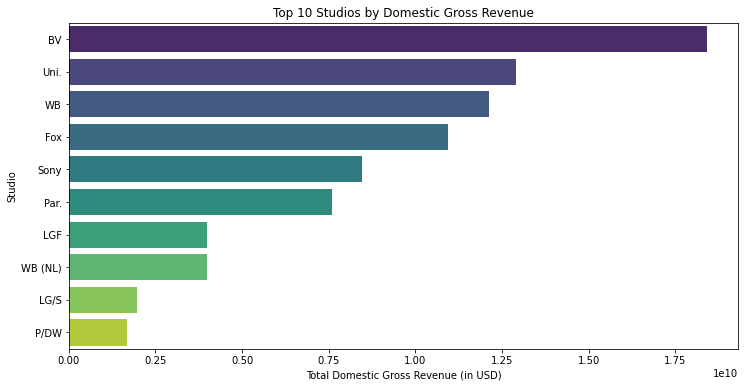

In [10]:
# Top 10 studios by total domestic gross revenue
top_studios = Data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_studios, x='domestic_gross', y='studio', palette="viridis")
plt.title("Top 10 Studios by Domestic Gross Revenue")
plt.xlabel("Total Domestic Gross Revenue (in USD)")
plt.ylabel("Studio")
plt.show()

BV Studio topped in domestic revenue

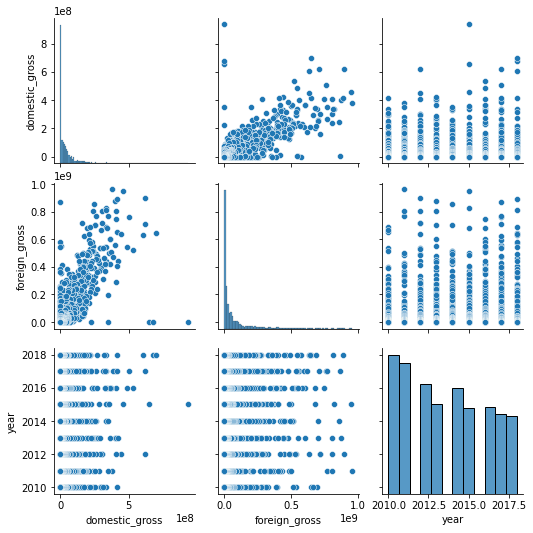

In [11]:
# Plotting a pairplot to check on correlation
sns.pairplot(Data)

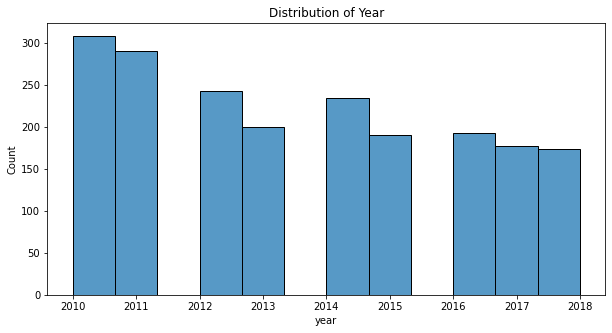

In [12]:
#Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(Data['year'])
plt.title('Distribution of Year')
plt.show()

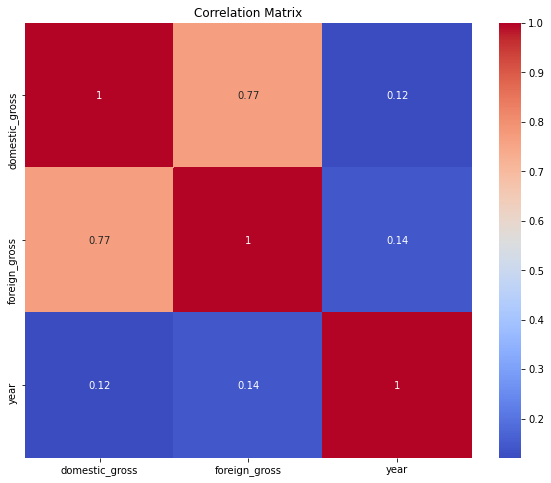

In [13]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()      

## Conclusion
Foreign gross earnings are generally higher than domestic gross, as indicated by the higher mean and median values.
The foreign gross has greater variability compared to domestic gross (higher standard deviation i.e. $ 138.18 million.

## 2  IMDB movie company analysis(Max & Jael)

In [14]:
import sqlite3

***Connecting to the imDB database***

In [15]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [16]:
q1 = """SELECT *
        FROM movie_ratings
        """
pd.read_sql(q1,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
q2 = """SELECT *
        FROM movie_basics
        """
pd.read_sql(q2,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
q4 = """SELECT *
        FROM movie_akas
        """
pd.read_sql(q4,conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [19]:
q5 = """SELECT *
        FROM principals
        """
pd.read_sql(q5,conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [20]:
q6 = """SELECT *
        FROM known_for
        """
pd.read_sql(q6,conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [21]:
q7 = """SELECT *
        FROM writers
        """
pd.read_sql(q7,conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [22]:
q7 = """SELECT *
        FROM persons
        """
pd.read_sql(q7,conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [23]:
q = """SELECT *
        FROM directors
        """
pd.read_sql(q,conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [24]:
q8 = """SELECT *
        FROM writers
        """
pd.read_sql(q8,conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [25]:
q3 = """SELECT *
        FROM movie_ratings
        JOIN movie_basics
        ON movie_ratings.movie_id = movie_basics.movie_id
        """
im_ratings = pd.read_sql(q3,conn)
im_ratings.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [26]:
im_ratings.shape

(73856, 9)

In [27]:
im_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   movie_id         73856 non-null  object 
 4   primary_title    73856 non-null  object 
 5   original_title   73856 non-null  object 
 6   start_year       73856 non-null  int64  
 7   runtime_minutes  66236 non-null  float64
 8   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [28]:
im_ratings.isna().sum()

movie_id              0
averagerating         0
numvotes              0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

***Checking the distribution of the Runtime minutes to see how to handle the missing values***

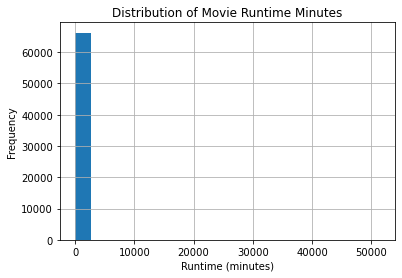

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64


In [29]:
im_ratings['runtime_minutes'].hist(bins=20)
plt.title('Distribution of Movie Runtime Minutes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

print(im_ratings['runtime_minutes'].describe())

***From the representation above we have a movie with a minimum of 3 minutes and a long movie with 51420 minutes. These outliers heavily affect the mean. The median, however, is least affected by the outliers.***

In [30]:
# Fill missing values only for the 'runtime_minutes' column
im_ratings['runtime_minutes'] = im_ratings['runtime_minutes'].fillna(im_ratings['runtime_minutes'].median())

# Check for missing values across all columns
print(im_ratings.isna().sum())

movie_id             0
averagerating        0
numvotes             0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
dtype: int64


In [31]:
# Get the count of each genre
genre_counts = im_ratings['genres'].value_counts()
print(genre_counts)
genre_percentages = im_ratings['genres'].value_counts(normalize=True) * 100
print("\nGenre percentages:")
print(genre_percentages)

Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Action,Family,Romance              1
Comedy,Musical,Sport               1
Documentary,Musical,Mystery        1
Animation,Crime,Mystery            1
Biography,Romance,War              1
Name: genres, Length: 923, dtype: int64

Genre percentages:
Drama                          15.895526
Documentary                    14.117341
Comedy                          7.683568
Horror                          3.685046
Comedy,Drama                    3.582380
                                 ...    
Action,Family,Romance           0.001369
Comedy,Musical,Sport            0.001369
Documentary,Musical,Mystery     0.001369
Animation,Crime,Mystery         0.001369
Biography,Romance,War           0.001369
Name: genres, Length: 923, dtype: float64


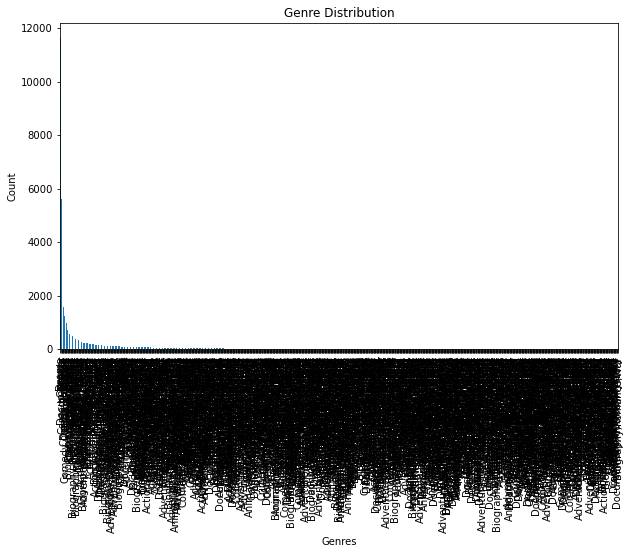

In [32]:
genre_counts.plot(kind='bar', figsize=(10, 6), title='Genre Distribution')
plt.xlabel('Genres') 
plt.ylabel('Count')
plt.show()

In [33]:
genre_counts = im_ratings['genres'].value_counts()
total_genres = len(im_ratings)
genre_percentages = (genre_counts / total_genres) * 100
im_ratings['genre_percentage'] = im_ratings['genres'].map(genre_percentages)


print(im_ratings.head())

     movie_id  averagerating  numvotes    movie_id           primary_title  \
0  tt10356526            8.3        31  tt10356526        Laiye Je Yaarian   
1  tt10384606            8.9       559  tt10384606              Borderless   
2   tt1042974            6.4        20   tt1042974               Just Inès   
3   tt1043726            4.2     50352   tt1043726  The Legend of Hercules   
4   tt1060240            6.5        21   tt1060240               Até Onde?   

           original_title  start_year  runtime_minutes  \
0        Laiye Je Yaarian        2019            117.0   
1              Borderless        2019             87.0   
2               Just Inès        2010             90.0   
3  The Legend of Hercules        2014             99.0   
4               Até Onde?        2011             73.0   

                     genres  genre_percentage  
0                   Romance          0.970808  
1               Documentary         13.963659  
2                     Drama         15

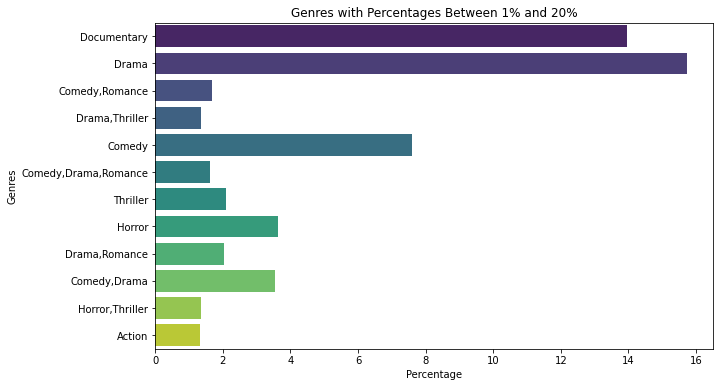

In [34]:
# Filter the DataFrame to include only genres with percentage between 1% and 20%
filtered_genres = im_ratings[(im_ratings['genre_percentage'] >= 1) & (im_ratings['genre_percentage'] <= 20)]

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.barplot(x='genre_percentage', y='genres', data=filtered_genres, palette='viridis')
plt.xlabel('Percentage')
plt.ylabel('Genres')
plt.title('Genres with Percentages Between 1% and 20%')
plt.show()


***For the Genres, since they are categorical data, we shall fill the missing values using the mode***

In [35]:
#Finding the mode
mode_genres = im_ratings['genres'].mode()[0]
print (mode_genres)

Drama


In [36]:
#Filling the Genre missing values with the mode
im_ratings['genres'] = im_ratings['genres'].fillna(mode_genres)
# Check for missing values across all columns
print(im_ratings.isna().sum())

movie_id              0
averagerating         0
numvotes              0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
genre_percentage    804
dtype: int64


***Checking the most popular Genre***

In [37]:
genre_counts = im_ratings['genres'].value_counts()
print(genre_counts)


Drama                          12416
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Action,Family,Romance              1
Comedy,Musical,Sport               1
Documentary,Musical,Mystery        1
Animation,Crime,Mystery            1
Biography,Romance,War              1
Name: genres, Length: 923, dtype: int64


In [38]:
import numpy as np
def calculate_quality_score(im_ratings, rating_col='averagerating', votes_col='numvotes'):
    
    # Log transformation of votes to avoid skewness and log(0) issues
    im_ratings['log_numvotes'] = np.log(im_ratings[votes_col] + 1)
    
    # Normalize votes by the maximum log vote count
    max_votes = im_ratings['log_numvotes'].max()
    
    # Calculate Quality Score
    im_ratings['quality_score'] = (im_ratings[rating_col] * im_ratings['log_numvotes']) / max_votes

    bins = [0, 4, 7, 10]
    labels = ['Low', 'Medium', 'High']
    
    im_ratings['quality_category'] = pd.cut(im_ratings['quality_score'], bins=bins, labels=labels, right=False)

    return im_ratings
try:

    im_ratings = calculate_quality_score(im_ratings)
    
    print(im_ratings[['averagerating', 'numvotes', 'quality_score', 'quality_category']].head(100))
except ValueError as e:
    print(f"Error: {e}")

    averagerating  numvotes  quality_score quality_category
0             8.3        31       1.994031              Low
1             8.9       559       3.904007              Low
2             6.4        20       1.350696              Low
3             4.2     50352       3.152161              Low
4             6.5        21       1.392761              Low
..            ...       ...            ...              ...
95            8.3        15       1.595225              Low
96            6.3      1447       3.178391              Low
97            5.3       147       1.835955              Low
98            4.4        64       1.273221              Low
99            7.4      2189       3.945573              Low

[100 rows x 4 columns]


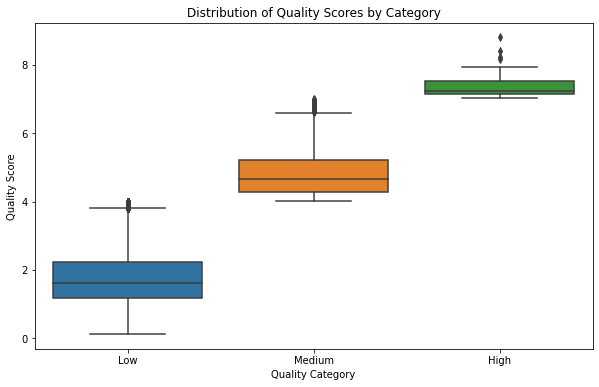

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality_category', y='quality_score', data=im_ratings)
plt.title('Distribution of Quality Scores by Category')
plt.xlabel('Quality Category')
plt.ylabel('Quality Score')
plt.show()

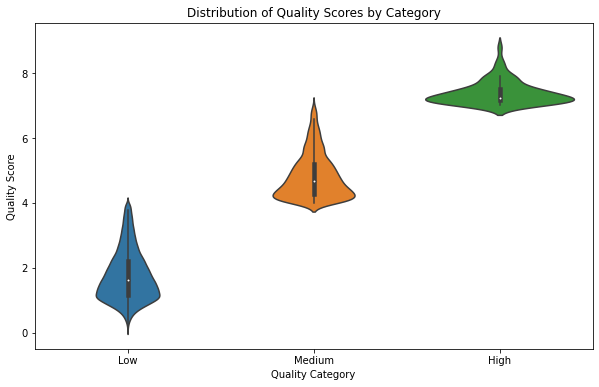

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality_category', y='quality_score', data=im_ratings)
plt.title('Distribution of Quality Scores by Category')
plt.xlabel('Quality Category')
plt.ylabel('Quality Score')
plt.show()

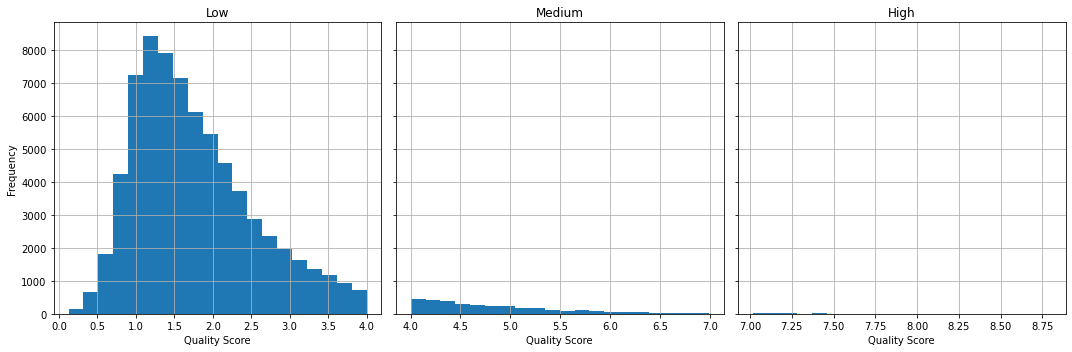

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, category in enumerate(['Low', 'Medium', 'High']):
    subset = im_ratings[im_ratings['quality_category'] == category]
    subset['quality_score'].hist(ax=ax[i], bins=20)
    ax[i].set_title(category)
    ax[i].set_xlabel('Quality Score')
    ax[i].set_ylabel('Frequency' if i == 0 else '')
plt.tight_layout()
plt.show()

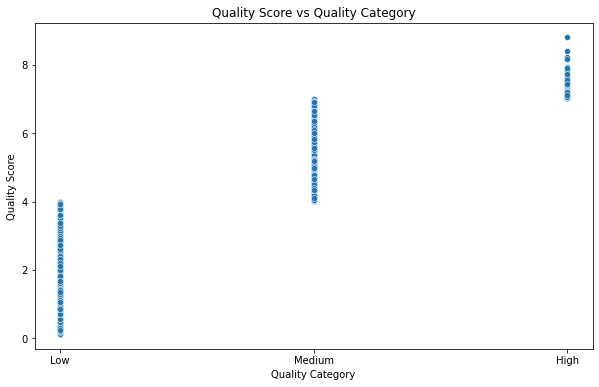

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality_category', y='quality_score', data=im_ratings)
plt.title('Quality Score vs Quality Category')
plt.xlabel('Quality Category')
plt.ylabel('Quality Score')
plt.show()

***Getting the 'go-to' number of run time minutes for most studios***


In [43]:
bins = [0, 60, 90, 120, 150, 180, im_ratings['runtime_minutes'].max()]
labels = ['0-60', '61-90', '91-120', '121-150', '151-180', '180+']

im_ratings['minutes_range'] = pd.cut(im_ratings['runtime_minutes'], bins=bins, labels=labels, include_lowest=True)

minutes_range_counts = im_ratings['minutes_range'].value_counts()

print(minutes_range_counts)

91-120     34429
61-90      28364
121-150     5247
0-60        4477
151-180     1096
180+         243
Name: minutes_range, dtype: int64


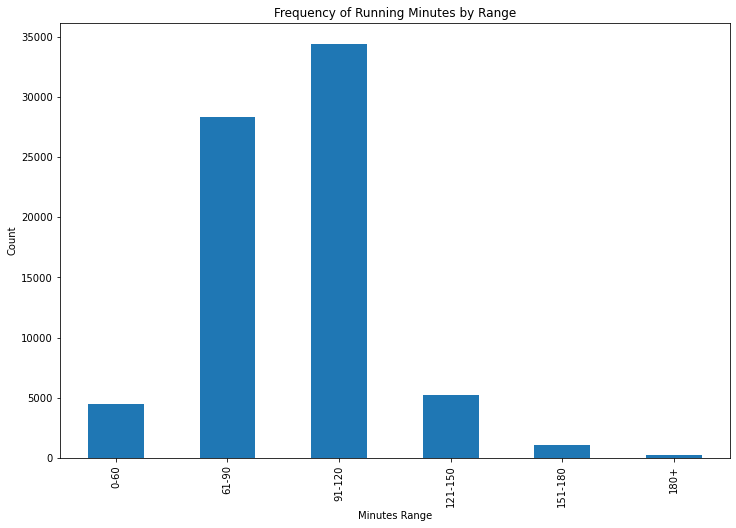

Most common range: 91-120 with 34429 occurrences


In [44]:
plt.figure(figsize=(12, 8))
minutes_range_counts.sort_index().plot(kind='bar')
plt.title('Frequency of Running Minutes by Range')
plt.xlabel('Minutes Range')
plt.ylabel('Count')
plt.show()

# To find the most common range visually or programmatically
print(f"Most common range: {minutes_range_counts.idxmax()} with {minutes_range_counts.max()} occurrences")

***Estimate of the quality of ratings based on the number of votes per genre***

In [45]:
genre_quality = im_ratings.groupby('genres')['quality_score'].mean().sort_values(ascending=False)
print(genre_quality)

genres
Documentary,Sport,Thriller    5.626526
Drama,War,Western             4.329496
Animation,Biography,Crime     4.294069
Biography,Music,Romance       4.253093
Comedy,Music,Thriller         4.127020
                                ...   
Action,Crime,Musical          0.546501
Adventure,Drama,Musical       0.535498
Animation,Horror,Romance      0.377693
Adventure,Crime,Romance       0.367115
Comedy,Musical,Sport          0.326789
Name: quality_score, Length: 923, dtype: float64


In [46]:

genres_encoded = pd.get_dummies(im_ratings['genres'], prefix='genre')

# Concatenate with quality_score for correlation
correlation_data = pd.concat([im_ratings['quality_score'], genres_encoded], axis=1)

# Calculate correlation
correlation_matrix = correlation_data.corr()
print(correlation_matrix['quality_score'].sort_values(ascending=False))

quality_score                       1.000000
genre_Adventure,Animation,Comedy    0.070831
genre_Action,Adventure,Sci-Fi       0.069067
genre_Biography,Drama,History       0.061538
genre_Comedy,Drama,Romance          0.059954
                                      ...   
genre_Action                       -0.046597
genre_Comedy                       -0.051181
genre_Drama                        -0.052270
genre_Documentary                  -0.091373
genre_Horror                       -0.113487
Name: quality_score, Length: 924, dtype: float64


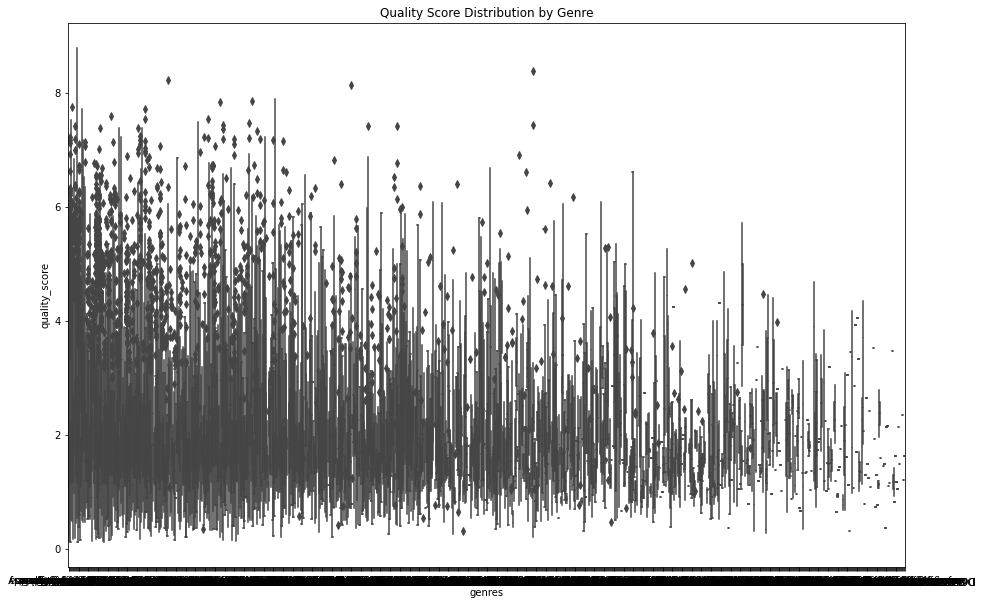

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='genres', y='quality_score', data=im_ratings)
plt.title('Quality Score Distribution by Genre')
plt.xticks(rotation=180)  # Rotate labels if they overlap
plt.show()

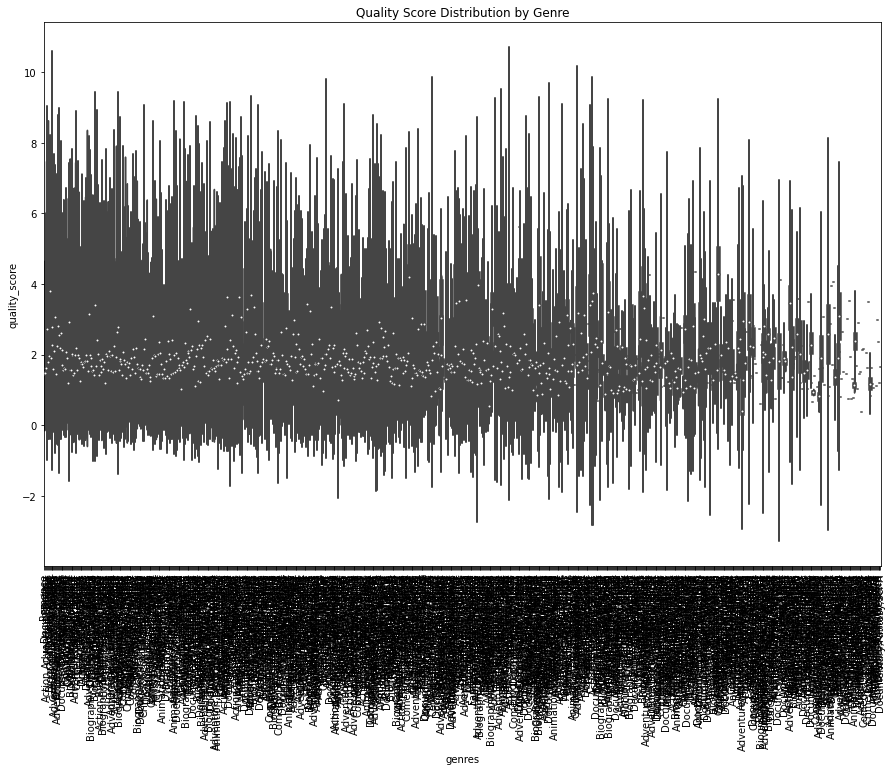

In [48]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='genres', y='quality_score', data=im_ratings)
plt.title('Quality Score Distribution by Genre')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='genres', y='quality_score', data=im_ratings)
plt.title('Quality Score vs Genre Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Count occurrences of each genre
genre_counts = im_ratings['genres'].value_counts()

# Get the top 30 genres
top_genres = genre_counts.nlargest(30).index.tolist()

In [ ]:
# Filter DataFrame to include only top 30 genres
im_ratings_top_genres = im_ratings[im_ratings['genres'].isin(top_genres)]

In [ ]:
# Average quality score per genre for top genres
genre_quality = im_ratings_top_genres.groupby('genres')['quality_score'].mean().sort_values(ascending=False)
print(genre_quality)
genres_encoded = pd.get_dummies(im_ratings_top_genres['genres'], prefix='genre')
correlation_data = pd.concat([im_ratings_top_genres['quality_score'], genres_encoded], axis=1)
correlation_matrix = correlation_data.corr()
print(correlation_matrix['quality_score'].sort_values(ascending=False))

In [ ]:
# Box Plot for top genres
plt.figure(figsize=(15, 10))
sns.boxplot(x='genres', y='quality_score', data=im_ratings_top_genres)
plt.title('Quality Score Distribution by Top 30 Genres')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Violin Plot for top genres
plt.figure(figsize=(15, 10))
sns.violinplot(x='genres', y='quality_score', data=im_ratings_top_genres)
plt.title('Quality Score Distribution by Top 30 Genres')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy import stats
f_val, p_val = stats.f_oneway(*[group['quality_score'].values for name, group in im_ratings_top_genres.groupby('genres')])
print(f'ANOVA F-value: {f_val}, p-value: {p_val}')

In [ ]:
import plotly.express as px
max_runtime = 300
im_ratings_top_genres['clipped_runtime'] = np.clip(im_ratings_top_genres['runtime_minutes'], None, max_runtime)

fig = px.scatter(im_ratings_top_genres, x='clipped_runtime', y='quality_score', 
                 color='genres', size='numvotes', hover_name='primary_title', 
                 title='Quality Score vs. Clipped Running Minutes by Genre')
fig.show()

Conclusion

*From the analysis the DRAMA genre is the safest genre to produce based on the industry frequency of producing that genre. However, ACTIN-CRIME-DRAMA, despite having a small audience had the best quality score compared to the top 30 genres. This genre most-likely attracts enthusiats and mite skew the ratings in favor of the production company. The industry go-to runtime mintes ranged between 91-120 minutes with longer movies having fewer audiences. Therefore, for a Blockbuster movie with a big budget, the action-crime-drama genre is most likely going to have better reviews and a bigger impact on the audience. For medium to low budget, however, the drama genre seems most appropriate due to its safe numbers.*

## 3 TMDB data source movie analysis (Evelyn)


#**Exploring Factors Influencing Movie Success**
   ##**AIMS**
   - To explore the relationship between movie popularity and other key metrics
   - To investigate the factors that contribute to movie popularity
   - To identify trends in movie popularity over time and analyze the impact of historical events and technological advancements on the film industry.

In [ ]:

#Load dataset
df = pd.read_csv("tmdb_movies.csv")

#### DATA ANALYSIS AND UNDERSTANDING

In [ ]:
#Number of rows and coloumns
print(df.shape)

This dataset has 26,517 rows and 10 coloumns

In [ ]:
#First few rows and coloumns
print(df.head())

In [ ]:
#Checking data types
print(df.dtypes)

In [ ]:
#Summary statistics
print(df.describe())

In [ ]:
#Summary statistics
print(df[['popularity', 'vote_average', 'vote_count']].describe())


In [ ]:
#Unique values
print(df['original_language'].unique())

In [ ]:
#Value counts
print(df['original_language'].value_counts())

In [ ]:
#Check for missing values
print(df.isnull().sum())

No Missing Values

### VISUALISATION OF DATA

In [ ]:
#POPULARITY DISTRIBUTION
#Histogram of distribution of movie popularity
import matplotlib.pyplot as plt

# Convert 'popularity' to numeric value 
df['popularity'] = pd.to_numeric(df['popularity'])

plt.hist(df['popularity'], bins=10)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Popularity')
plt.show()


In [ ]:
#Relationship between Vote Average and Popularity
plt.scatter(df['vote_average'], df['popularity'])
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Vote Average vs. Popularity')
plt.show()

Movies with higher popularity tend to have better ratings. 

In [ ]:
#Top 10 Most Popular Movies
top_movies = df.sort_values(by='popularity', ascending=False).head(10)
print(top_movies[['title', 'popularity']])

In [ ]:
#Distribution of Movies by Language
df['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Language')
plt.show()


The bar graph of movies by original language can provide insights into the dominance of English-language movies in the dataset.

#### Null and Alternate Hypothesis

In [ ]:
#Hypothesis test to compare the average popularity of movies in the English languageversus movies in other languages
#Split the data
english_movies = df[df['original_language'] == 'en']
other_language_movies = df[df['original_language'] != 'en']

In [ ]:
#T-test (Suitable model)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(english_movies['popularity'], other_language_movies['popularity'])

In [ ]:
# Set significance level
alpha = 0.05

In [ ]:
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a statistically significant difference in the average popularity of movies in English and other languages.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in the average popularity of movies in English and other languages.")

In [ ]:
#Hypothesis test to compare the average vote count between movies with high and low popularity 
#Split the Data
median_popularity = df['popularity'].median()
high_popularity_movies = df[df['popularity'] > median_popularity]
low_popularity_movies = df[df['popularity'] < median_popularity]

In [ ]:
#Perform the t-test (Suitable model)
t_stat, p_value = ttest_ind(
    high_popularity_movies['vote_count'], low_popularity_movies['vote_count']
)

In [ ]:
#Significance level
alpha = 0.05

#Compare p-value to alpha
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a statistically significant difference in the average vote count between movies with high popularity and movies with low popularity.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in the average vote count between movies with high popularity and movies with low popularity.")

In [ ]:
# Bar Plot of Top 15 Most Popular Movies
top_15_movies = df.nlargest(15, 'popularity')
plt.figure(figsize=(10, 6))
plt.bar(top_15_movies['original_title'], top_15_movies['popularity'])
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 15 Most Popular Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Load the data
# Load the data
df_ = pd.read_csv("tmdb_movies.csv", parse_dates=['release_date']) 
# Sort the DataFrame by release date
df = df.sort_values(by='release_date') 

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['popularity'])
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Movie Popularity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

-High Volatility: The graph exhibits a high degree of volatility. Popularity levels fluctuate significantly over time with numerous peaks and troughs. This suggests a dynamic and unpredictable nature of movie popularity.

-Lack of Clear Trend: There doesn't appear to be a consistent upward or downward trend in movie popularity over the displayed period. 

In [ ]:
# Select the numerical columns for correlation analysis
df = pd.read_csv("tmdb_movies.csv")

numerical_columns = ['popularity', 'vote_average', 'vote_count']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


-Strong Positive Correlation (values close to 1): Indicates a strong positive relationship between the two variables. For example, if popularity and vote average have a strong positive correlation, it suggests that movies with higher popularity tend to have higher average ratings.

-Strong Negative Correlation (values close to -1): Indicates a strong negative relationship between the two variables.

-Weak Correlation (values close to 0): Indicates a weak or no relationship between the two variables.

**KEY OBSERVATIONS**

-High Popularity Movies: Movies with high popularity tend to have higher average vote counts compared to movies with low popularity. This suggests that popular movies generally receive better ratings from viewers.

-Language Influence: The analysis of vote average by original language might reveal potential biases or trends in how movies in different languages are rated. Further investigation is needed to draw definitive conclusions.

-Distribution of Popularity: The distribution of movie popularity is skewed, with a few highly popular movies and a large number of movies with lower popularity. This finding highlights the challenge of achieving widespread success in the movie industry.

**MAJOR FINDINGS**
-High budget: Movies with high budgets OFTEN achieve greater popularity due to vast and intense marketing.
-Genre popularity: Certain genres like action, adventure, and fantasy rank high in popularity.
-Star power: Movies with renowned and famous actors and directors tend to attract larger audiences.
-Release date: Factors like seasonality , holiday releases, and competition from others can impact popularity.
-Relationship with vote count: Higher vote counts generally indicate a larger audience base.
-Impact of technological advancements: The use of advanced technology eg.streaming platforms have impacted movie production and audience engagement.

**CONCLUSION**
-The analysis provides a preliminary understanding of the relationship between popularity, vote average, release dates, language and other factors in the movie dataset.

## 4 TN movie budgets dataset(Humphrey and Charity)

In [ ]:
#Import data from the datasource using pandas and showing the first 5 columns
df_movie_budgets=pd.read_csv('tn_movie_budgets.csv')
df_movie_budgets.head()

In [ ]:
# Getting more info about the data to gain a better understanding 
df_movie_budgets.info()

#### Data EDA and cleanup
From the info gotten above, we can see that the dataset has 5782 rows and 6 columns.

In the cell below we will check for null/missing values and duplicate values from the datasource.

In the production_budget, domestic_gross and worldwide_gross columns, I will remove currency sign and commas to make them fully numeric

In [ ]:
# Checking for null values
na_values = df_movie_budgets.isnull().sum()
print(na_values)

# The data source has no null values on any of the columns

In [ ]:
# Checking for duplicate values
duplicates = df_movie_budgets[df_movie_budgets.duplicated()].sum()
print(duplicates)

#from the analysis seen below the data also has no duplicate values

I will combine both the domestic gross income and worldwide gross income into a new column called total gross income and this will form the basis of our analysis later


In [ ]:
# Set pandas display options to prevent scientific notation

pd.set_option('display.float_format', '{:.2f}'.format)

columns_to_clean = ["production_budget", "domestic_gross", "worldwide_gross"]
df_movie_budgets[columns_to_clean] = (
    df_movie_budgets[columns_to_clean]
    .replace({"[$,]": ""}, regex=True)
    .astype(float)
)

# Calculate total gross income correctly
df_movie_budgets["total_gross_income"] = (
    df_movie_budgets["domestic_gross"] + df_movie_budgets["worldwide_gross"]
)
df_movie_budgets.head()


### Defining null and alternate hypothesis

 #### Null Hypotheis(H0)
 
 The average total gross income does not increase with increase in production budget
 
 #### Alternate Hypotheis(Ha )
 
  The average total gross income increases with increase in production budget
  
 #### Choosing the significance level(α)
  
  The probability threshold for rejecting my null hypothesis is 5%
  
  Significance level=5%


In [ ]:

# Scatterplot with Seaborn showing correlation between production budget and Total gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='total_gross_income', data=df_movie_budgets, alpha=0.7)
plt.title('Scatterplot of Production Budget vs. Total Gross Income', fontsize=14)
plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Total Gross Income', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr

#Calculating the correlation coefficient (𝑟) between production budget and total gross income:

r, p_value = pearsonr(df_movie_budgets['production_budget'], df_movie_budgets['total_gross_income'])
print(f"Correlation coefficient: {r}")
print(f"P-value: {p_value}")

In [ ]:
import statsmodels.api as sm

# Independent variable (budget)
X = df_movie_budgets['production_budget']
X = sm.add_constant(X)  # Add constant term for the intercept

# Dependent variable (total gross income)
y = df_movie_budgets['total_gross_income']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

#### Interpretation of results

From the above linear regression regression model, we can conclude that 
* The value of R-squared being equal to 0.547 means that 54.7% of the data describes the linear model making it suitable for analysis

* The p-value is essentially zero(0.00), confirming that the relationship between total gross income and production budget is statistically significant.

* From the production budget coefficient of 4.2460,  For every 1 dollar increase in the production budget, the total gross income increases by approximately 4.25 dollars, on average.

### Recommendation

I would recommend to the head of the company that spending more money on producing a movie leads to higher quality movie which further traslates to more income.
